In [1]:
import numpy as np
import ROOT

Welcome to JupyROOT 6.28/06


In [2]:
sig = 5
bkg = 30
tau = 1

In [3]:
mu1 = 1
mu0 = 0

In [4]:
En0 = mu0 * sig + bkg
Em0 = tau* bkg

In [5]:
En1 = mu1 * sig + bkg
Em1 = tau* bkg

In [6]:
samplePoints = 10000

In [7]:
n0 = np.random.poisson(En0, samplePoints)
m0 = np.random.poisson(Em0, samplePoints)

In [8]:
n1 = np.random.poisson(En1, samplePoints)
m1 = np.random.poisson(Em1, samplePoints)

In [9]:
def likelihood_fn(n, m, tau, mu, s, b):
    mu_cap = (n - m/tau)/s
    b_cap = m/tau
    b_cap2 = (((n + m - (1 + tau)*mu*s)**2 + 4*(1 + tau)*m*mu*s)/(4*(1 + tau)**2))**0.5 + (n + m - (1 + tau)*mu*s)/(2*(1+tau)) 
    print(b_cap)
    print(b_cap2)
    ln =  ((mu*s + b_cap2)**n)*((tau*b_cap2)**m)*np.exp(-(mu*s + b_cap2))*np.exp(-tau*b_cap2)
    ld =  ((mu_cap*s + b_cap)**n)*((tau*b_cap)**m)*np.exp(-(mu_cap*s + b_cap))*np.exp(-tau*b_cap)
    print(ln)
    print(ld)
    ratio = ln/ld
    ratio = -2 * np.log(ratio)
    ratio[mu_cap < 0] = 0
    q0 = ratio
    return q0

In [10]:
q0_0 = likelihood_fn(n0, m0, tau, mu0, sig, bkg)
q0_1 = likelihood_fn(n1, m1, tau, mu1, sig, bkg)

[27. 20. 27. ... 28. 36. 36.]
[28.5 28.5 32.  ... 24.5 35.5 32.5]
[1.48378697e+58 1.48378697e+58 3.42571927e+68 ... 6.14764132e+46
 1.70335375e+79 1.10478340e+70]
[1.60573475e+58 1.94660680e+59 7.50651888e+68 ... 1.01531418e+47
 1.71539194e+79 1.61172389e+70]
[19. 32. 32. ... 31. 24. 31.]
[24.90708768 29.23632228 32.4642492  ... 29.15793827 27.66852875
 30.07674187]
[2.12953479e+57 8.18104342e+66 6.20665952e+77 ... 9.58204395e+66
 2.66937008e+64 1.14818104e+70]
[9.98369309e+57 1.08757560e+67 6.25118346e+77 ... 1.08757560e+67
 4.53492590e+64 1.18400726e+70]


In [11]:
hq0 = ROOT.TH1F("hq0", "hq0", 120, 0, 30)
hq01 = ROOT.TH1F("hq01", "hq01", 120, 0, 30)

for i in range(q0_0.shape[0]):
    hq0.Fill(q0_0[i])
    hq01.Fill(q0_1[i])

In [12]:
q0_ = np.linspace(0, 40, 5000)
dist_q0 = 0.5 * (1./(2. * np.pi)**0.5) * (1. / q0_** 0.5) * np.exp(-q0_/2.)
#dist_q0 = dist_q0 + 0.5
gq0 = ROOT.TGraph(q0_.shape[0]-1, q0_[1:], dist_q0[1:])

/tmp/ipykernel_1769/803249774.py:2: RuntimeWarning: divide by zero encountered in divide
  dist_q0 = 0.5 * (1./(2. * np.pi)**0.5) * (1. / q0_** 0.5) * np.exp(-q0_/2.)


In [13]:
mu_prime = 1.
nA = np.ones(1)*(mu_prime * sig + bkg)
mA = np.ones(1)*(tau * bkg)
q0_1A = likelihood_fn(nA, mA, tau, mu1, sig, bkg)
sigmaA = 1./ q0_1A

[30.]
[30.]
[1.3393e+70]
[1.3393e+70]


/tmp/ipykernel_1769/165415458.py:5: RuntimeWarning: divide by zero encountered in divide
  sigmaA = 1./ q0_1A


In [14]:
q0_1 = np.linspace(0, 40, 5000)
dist_q01 = 0.5 * (1./(2. * np.pi)**0.5) * (1. / q0_1** 0.5) * np.exp(-0.5*(q0_1**0.5 - mu_prime/sigmaA)**2)
#dist_q0 = dist_q0 + 0.5
gq01 = ROOT.TGraph(q0_1.shape[0]-1, q0_1[1:], dist_q01[1:])

/tmp/ipykernel_1769/2324868327.py:2: RuntimeWarning: divide by zero encountered in divide
  dist_q01 = 0.5 * (1./(2. * np.pi)**0.5) * (1. / q0_1** 0.5) * np.exp(-0.5*(q0_1**0.5 - mu_prime/sigmaA)**2)


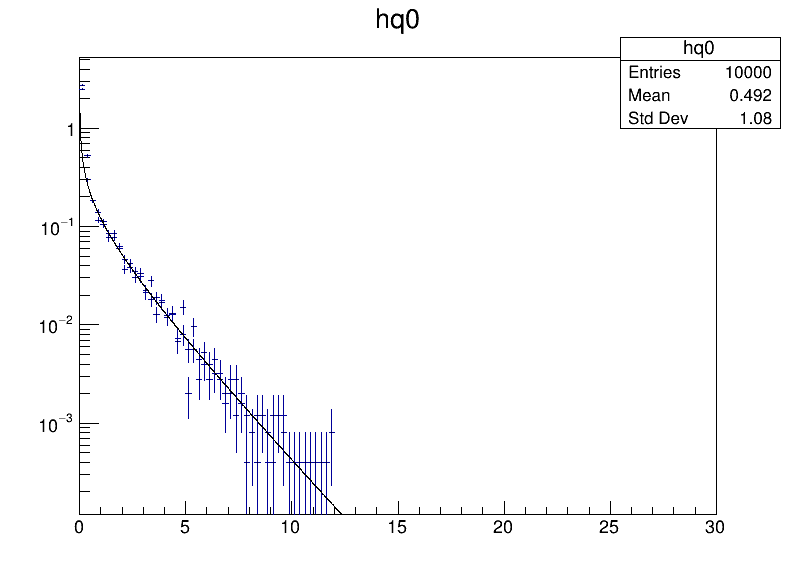

In [15]:
canvas = ROOT.TCanvas("canvas", "1D Histogram", 800, 600)
canvas.SetLogy()
hq0.Scale(1.0 / (hq0.Integral()* 0.25))
hq01.Scale(1.0 / (hq01.Integral()* 0.25))
hq0.Draw()
hq01.Draw("SAME")
#hq0.SetLineColor(ROOT.kRed)
gq0.Draw("SAME")
gq01.Draw("SAME")
# Display the canvas
canvas.Draw()